In [10]:
cd ~/Desktop/ML-Linear_regression/sgemm_product_dataset

/Users/Sujatha/Desktop/ML-Linear_regression/sgemm_product_dataset


In [11]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sn

data = pd.read_csv('sgemm_product.csv') # loading the dataset from directory
data = pd.DataFrame(data)
data.shape, data.dtypes, data.info() #dataset shape, datatypes and null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241600 entries, 0 to 241599
Data columns (total 18 columns):
MWG          241600 non-null int64
NWG          241600 non-null int64
KWG          241600 non-null int64
MDIMC        241600 non-null int64
NDIMC        241600 non-null int64
MDIMA        241600 non-null int64
NDIMB        241600 non-null int64
KWI          241600 non-null int64
VWM          241600 non-null int64
VWN          241600 non-null int64
STRM         241600 non-null int64
STRN         241600 non-null int64
SA           241600 non-null int64
SB           241600 non-null int64
Run1 (ms)    241600 non-null float64
Run2 (ms)    241600 non-null float64
Run3 (ms)    241600 non-null float64
Run4 (ms)    241600 non-null float64
dtypes: float64(4), int64(14)
memory usage: 33.2 MB


((241600, 18), MWG            int64
 NWG            int64
 KWG            int64
 MDIMC          int64
 NDIMC          int64
 MDIMA          int64
 NDIMB          int64
 KWI            int64
 VWM            int64
 VWN            int64
 STRM           int64
 STRN           int64
 SA             int64
 SB             int64
 Run1 (ms)    float64
 Run2 (ms)    float64
 Run3 (ms)    float64
 Run4 (ms)    float64
 dtype: object, None)

In [12]:
data.columns = [c.replace(' ', '_') for c in data.columns] # space in col names are replaced by '_'

col = data.loc[ : ,"Run1_(ms)":"Run4_(ms)"]

data['avg_run'] = col.mean(axis = 1) # calculating avg run from the 4 runs

data = data.drop(["Run1_(ms)","Run2_(ms)", "Run3_(ms)", "Run4_(ms)"], axis=1)
data.dtypes # dropped the run time variables as we have the avg_run

MWG          int64
NWG          int64
KWG          int64
MDIMC        int64
NDIMC        int64
MDIMA        int64
NDIMB        int64
KWI          int64
VWM          int64
VWN          int64
STRM         int64
STRN         int64
SA           int64
SB           int64
avg_run    float64
dtype: object

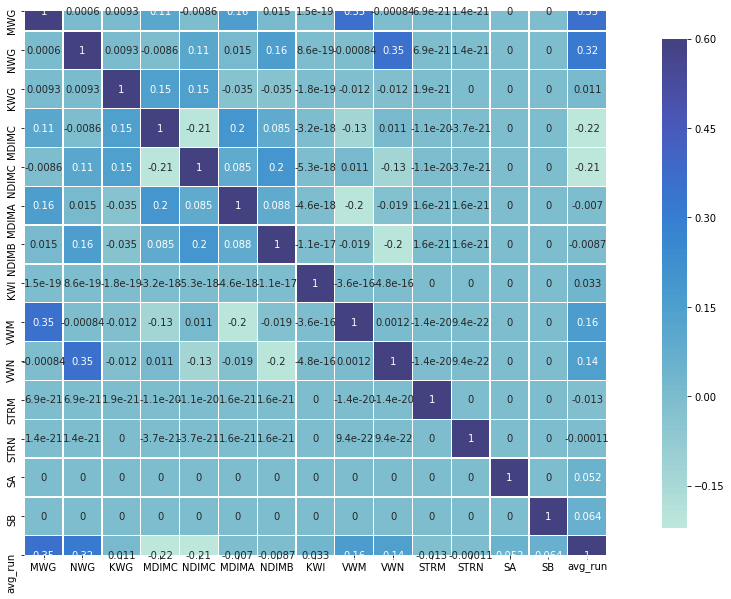

In [30]:
corrMatrix = data.corr()
f, ax = plt.subplots(figsize=(20, 10))
sn.heatmap(corrMatrix, vmax=.6, center=1,
            square=True, linewidths=.3, cbar_kws={"shrink": .9}, annot = True)

In [31]:
## Split our data into 70% train and 30%test
data = data.sample(frac=1) ## random distribution of data

train_index = int(0.7 * data.shape[0])
train = data.head(train_index)
test = data.tail(data.shape[0] - train_index)

train.shape,test.shape

((169120, 15), (72480, 15))

In [32]:
X = train.iloc[:, :14] # X variables from the dataset

x = np.full([169120,1],1) # X(0) variables added for beta(0) variables as 1
X = np.hstack((x,X)) # full set of X variables

Y = train["avg_run"] # Y avriables

B = np.zeros(X.shape[1]) # Initial values of beta variables

X.shape, Y.shape, B.shape #dimensions for the X, Y, beta vectors

((169120, 15), (169120,), (15,))

In [33]:
## Defining the cost MSE function

def cost_function(X_var, Y_actual, B_var):
    m = len(Y_actual)
    Y_pred = np.dot(X_var, B_var)
    J = sum((Y_pred - Y_actual) **2)/(2*m)
    return J


In [66]:
## Define batch gradient function

def gradient_descent(X_var, Y_actual, B_var, alpha, iterations):
    m = len(Y_actual)
    cost_history = np.zeros(iterations)
    temp_B_var = B_var.copy()
    
    for iteration in range(0, iterations):
        Y_pred = np.dot(X_var, B_var)
        cost = cost_function(X_var, Y_actual, B_var)
        cost_history[iteration] = cost

# threshold for the cost reduction
        if abs(cost_history[iteration] - cost_history[iteration - 1]) <= 0.1:
            print(iteration,cost_history[iteration]," ", cost_history[iteration-1])
            break
               
# Because we have added added X0 = 1 for beta(0), we are updating all together
        for j in range (0, 15):
            temp_B_var[j] = B_var[j] - (alpha/m) * sum((Y_pred - Y_actual) * X_var[:,j])
        B_var = temp_B_var.copy()
            
    return B_var, cost_history

In [67]:
## Initail values of cost with initial values of beta's
cost_function(X,Y,B)

91735.34274861879

### 1st experiment
### Experiment with various parameters for linear and logistic regression (e.g. learning rate ∝) and report on your findings as how the error/accuracy varies for train and test sets with varying these parameters. Plot the results. Report the best values of the parameters.

#### aplha = 0.001 and 2000 iterations

In [63]:
alpha_11 = 0.0001
iterations_11 = 2000

new_B_11,cost_11 = gradient_descent(X, Y, B, alpha_11, iterations_11)

new_B_11, cost_11 

(array([ -0.17698845,   3.29934202,   3.01786473,   4.93023563,
        -16.7562962 , -16.36603311,   0.97660833,   1.02756836,
          3.05234902,  -0.89690079,  -1.34849673,  -0.53862204,
         -0.1012255 ,   1.83458238,   2.22048668]),
 array([91735.34274862, 70745.75067284, 62239.09063095, ...,
        40828.12449744, 40828.09407518, 40828.06366394]))

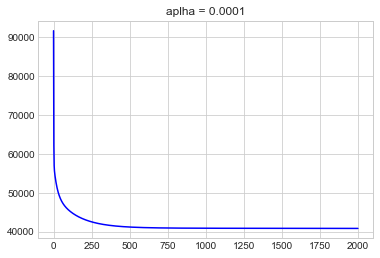

In [71]:
itera = np.arange(iterations_11)
itera.shape
plt.style.use('seaborn-whitegrid')
plt.plot(itera, cost_11, color='blue')
plt.title("aplha = 0.0001");

In [70]:
## Fit to test data
test_X = test.iloc[:, :14]
test_x = np.full([72480,1],1) # X(0) variables added for beta(0) variables as 1
test_X = np.hstack((test_x,test_X))

Y_test = test["avg_run"]

B_11 = new_B_11

test_Y_pred_11 = np.dot(test_X, B_11)

train_error_11 = cost_function(X, Y, B_11)
test_error_11 = cost_function(test_X, Y_test, B_11)

train_error_11 , test_error_11

1020 40537.403511551835   40537.503165934344


(40828.03326370448, 40493.86514679535)

### alpha = 0.00005 & iterations = 2000

In [72]:
alpha_12 = 0.00005
iterations_12 = 2000

new_B_12,cost_12 = gradient_descent(X, Y, B, alpha_12, iterations_12)

new_B_12, cost_12

1762 40894.124957626875   40894.22482247907


(array([ -0.10824575,   3.29214312,   3.00692656,   4.56987968,
        -16.07017429, -15.67462147,   0.80598324,   0.86601327,
          1.93489958,  -0.2763384 ,  -0.52645796,  -0.25514615,
         -0.05992262,   0.8059273 ,   0.97604595]),
 array([91735.34274862, 58776.29837251, 57430.10283916, ...,
            0.        ,     0.        ,     0.        ]))

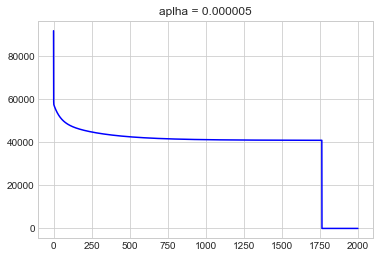

In [73]:
itera_12 = np.arange(iterations_12)
itera.shape
plt.style.use('seaborn-whitegrid')
plt.plot(itera_12, cost_12, color='blue')
plt.title("aplha = 0.000005");

In [74]:
## Fit to test data
test_X = test.iloc[:, :14]
test_x = np.full([72480,1],1) # X(0) variables added for beta(0) variables as 1
test_X = np.hstack((test_x,test_X))

Y_test = test["avg_run"]

B_12 = new_B_12

test_Y_pred_12 = np.dot(test_X, B_12)

train_error_12 = cost_function(X, Y, B_12)
test_error_12 = cost_function(test_X, Y_test, B_12)

train_error_12 , test_error_12

(40894.124957626875, 40557.21436015088)

In [83]:
### alpha = 0.0005 and iterations = 2000

alpha_13 = 0.0005
iterations_13 = 2000

new_B_13,cost_13 = gradient_descent(X, Y, B, alpha_13, iterations_13)

new_B_13, cost_13

/Users/Sujatha/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/Sujatha/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


(array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan]),
 array([   91735.34274862,  1783927.24942753, 88101803.02255234, ...,
                      nan,               nan,               nan]))

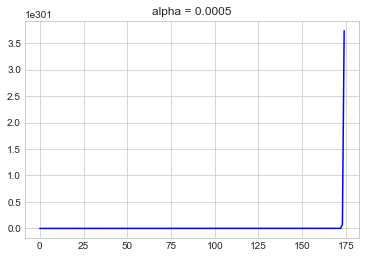

In [84]:
itera_13 = np.arange(iterations_13)
itera.shape
plt.style.use('seaborn-whitegrid')
plt.plot(itera_13, cost_13, color='blue')
plt.title("alpha = 0.0005");

In [77]:
## Fit to test data
test_X = test.iloc[:, :14]
test_x = np.full([72480,1],1) # X(0) variables added for beta(0) variables as 1
test_X = np.hstack((test_x,test_X))

Y_test = test["avg_run"]

B_13 = new_B_13

test_Y_pred_13 = np.dot(test_X, B_13)

train_error_13 = cost_function(X, Y, B_13)
test_error_13 = cost_function(test_X, Y_test, B_13)

train_error_13 , test_error_13

(nan, nan)

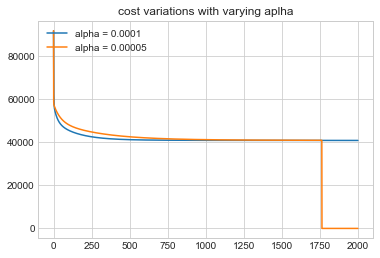

In [85]:
## EXPERIMENT 1 GRAPHS

plt.plot(itera, cost_11)
plt.plot(itera, cost_12)

plt.legend(['alpha = 0.0001', 'alpha = 0.00005'], loc='upper left')
plt.title("cost variations with varying aplha")

plt.show()

### Experiment 2: Experiment with various thresholds for convergence for linear and logistic regression. Plot error results for train and test sets as a function of threshold and describe how varying the threshold affects error. Pick your best threshold and plot train and test error (in one figure) as a function of number of gradient descent iterations.

In [117]:
## Define batch gradient function

def gradient_descent(X_var, Y_actual, B_var, alpha, iterations):
    m = len(Y_actual)
    cost_history = np.zeros(iterations)
    temp_B_var = B_var.copy()
    
    
    for iteration in range(0, iterations):
        Y_pred = np.dot(X_var, B_var)
        cost = cost_function(X_var, Y_actual, B_var)
        cost_history[iteration] = cost

# threshold for the cost reduction
        if abs(cost_history[iteration] - cost_history[iteration - 1]) <= 0.1:
            print(iteration,cost_history[iteration]," ", cost_history[iteration-1])
            break
               
# Because we have added added X0 = 1 for beta(0), we are updating all together
        for j in range (0, 15):
            temp_B_var[j] = B_var[j] - (alpha/m) * sum((Y_pred - Y_actual) * X_var[:,j])
        B_var = temp_B_var.copy()
        
            
    return B_var, cost_history

In [118]:
### Threshold = 0.1, alpha = 0.0001 and iterations = 5000

alpha_21 = 0.0001
iterations_21 = 5000

new_B_21,cost_21 = gradient_descent(X, Y, B, alpha_21, iterations_21)

new_B_21, cost_21

1036 40872.15729418174   40872.257045615195


(array([ -0.11630944,   3.29265872,   3.00805372,   4.7333625 ,
        -16.35472284, -15.95943071,   0.89031409,   0.94926831,
          2.17222498,  -0.36963076,  -0.65208169,  -0.29415143,
         -0.06498579,   0.95092335,   1.15122606]),
 array([91735.34274862, 70745.75067284, 62239.09063095, ...,
            0.        ,     0.        ,     0.        ]))

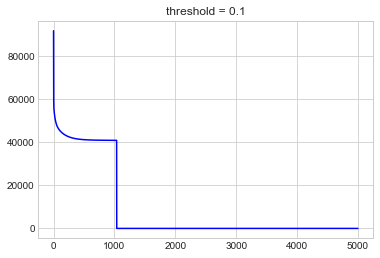

In [119]:
itera_21 = np.arange(iterations_21)
itera.shape
plt.style.use('seaborn-whitegrid')
plt.plot(itera_21, cost_21, color='blue')
plt.title("threshold = 0.1");

In [127]:
## Experiment conversges at 1036 iteration, therefeore taking those beta values we will calculate the cost
## Fit to test data
test_X = test.iloc[:, :14]
test_x = np.full([72480,1],1) # X(0) variables added for beta(0) variables as 1
test_X = np.hstack((test_x,test_X))

Y_test = test["avg_run"]

B_21 = new_B_21

test_Y_pred_21 = np.dot(test_X, B_21)

train_error_21 = cost_function(X, Y, B_21)
test_error_21 = cost_function(test_X, Y_test, B_21)

train_error_21 , test_error_21


(40872.15729418174, 40535.131635485806)

In [120]:
## Define batch gradient function

def gradient_descent(X_var, Y_actual, B_var, alpha, iterations):
    m = len(Y_actual)
    cost_history = np.zeros(iterations)
    temp_B_var = B_var.copy()
    
    
    for iteration in range(0, iterations):
        Y_pred = np.dot(X_var, B_var)
        cost = cost_function(X_var, Y_actual, B_var)
        cost_history[iteration] = cost

# threshold for the cost reduction
        if abs(cost_history[iteration] - cost_history[iteration - 1]) <= 0.001:
            print(iteration,cost_history[iteration]," ", cost_history[iteration-1])
            break
               
# Because we have added added X0 = 1 for beta(0), we are updating all together
        for j in range (0, 15):
            temp_B_var[j] = B_var[j] - (alpha/m) * sum((Y_pred - Y_actual) * X_var[:,j])
        B_var = temp_B_var.copy()
        
            
    return B_var, cost_history

In [121]:
### Threshold = 0.001, alpha = 0.0001 and iterations = 5000

alpha_22 = 0.0001
iterations_22 = 5000

new_B_22,cost_22 = gradient_descent(X, Y, B, alpha_22, iterations_22)

new_B_22, cost_22

(array([ -0.38017515,   3.31742826,   3.04149337,   4.93379288,
        -16.7981512 , -16.4188248 ,   0.93285894,   0.96672869,
          3.62448154,  -1.85606759,  -2.60602774,  -1.26980973,
         -0.2158339 ,   4.44428664,   5.38051007]),
 array([91735.34274862, 70745.75067284, 62239.09063095, ...,
        40759.4804346 , 40759.46145198, 40759.44247092]))

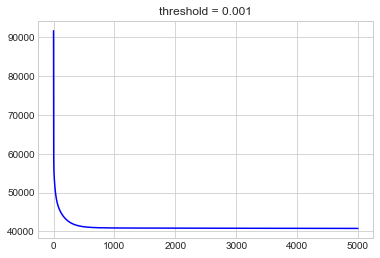

In [122]:
itera_22 = np.arange(iterations_22)
itera.shape
plt.style.use('seaborn-whitegrid')
plt.plot(itera_22, cost_22, color='blue')
plt.title("threshold = 0.001");

In [132]:
## Fit to test data
test_X = test.iloc[:, :14]
test_x = np.full([72480,1],1) # X(0) variables added for beta(0) variables as 1
test_X = np.hstack((test_x,test_X))

Y_test = test["avg_run"]

B_22 = new_B_22

test_Y_pred_22 = np.dot(test_X, B_22)

train_error_22 = cost_function(X, Y, B_22)
test_error_22 = cost_function(test_X, Y_test, B_22)

train_error_22 , test_error_22

(40759.42349140618, 40432.33579099507)

In [128]:
## Define batch gradient function

def gradient_descent(X_var, Y_actual, B_var, alpha, iterations):
    m = len(Y_actual)
    cost_history = np.zeros(iterations)
    temp_B_var = B_var.copy()
    
    
    for iteration in range(0, iterations):
        Y_pred = np.dot(X_var, B_var)
        cost = cost_function(X_var, Y_actual, B_var)
        cost_history[iteration] = cost

# threshold for the cost reduction
        if abs(cost_history[iteration] - cost_history[iteration - 1]) <= 0.001:
            print(iteration,cost_history[iteration]," ", cost_history[iteration-1])
            break
               
# Because we have added added X0 = 1 for beta(0), we are updating all together
        for j in range (0, 15):
            temp_B_var[j] = B_var[j] - (alpha/m) * sum((Y_pred - Y_actual) * X_var[:,j])
        B_var = temp_B_var.copy()
        
            
    return B_var, cost_history

In [129]:
### alpha = 0.0001 and iterations = 10000

alpha_21 = 0.0001
iterations_21 = 10000

new_B_21,cost_21 = gradient_descent(X, Y, B, alpha_21, iterations_21)

new_B_21, cost_21

(array([ -0.71965404,   3.32577567,   3.05278926,   4.9200373 ,
        -16.81714515, -16.44431361,   0.90349673,   0.92724201,
          3.65341492,  -2.36746923,  -3.27539204,  -2.37310249,
         -0.39050529,   8.38006646,  10.14628958]),
 array([91735.34274862, 70745.75067284, 62239.09063095, ...,
        40678.55535937, 40678.5413746 , 40678.52739057]))

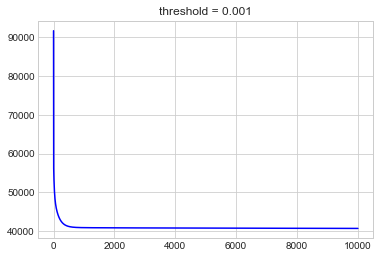

In [130]:
itera_23 = np.arange(iterations_21)
itera.shape
plt.style.use('seaborn-whitegrid')
plt.plot(itera_23, cost_21, color='blue')
plt.title("threshold = 0.001");

In [131]:
## Experiment conversges at 1036 iteration, therefeore taking those beta values we will calculate the cost
## Fit to test data
test_X = test.iloc[:, :14]
test_x = np.full([72480,1],1) # X(0) variables added for beta(0) variables as 1
test_X = np.hstack((test_x,test_X))

Y_test = test["avg_run"]

B_21 = new_B_21

test_Y_pred_21 = np.dot(test_X, B_21)

train_error_21 = cost_function(X, Y, B_21)
test_error_21 = cost_function(test_X, Y_test, B_21)

train_error_21 , test_error_21

(40678.513407279934, 40357.20949343138)

In [153]:
## Define batch gradient function

def gradient_descent(X_var, Y_actual, B_var, alpha, iterations):
    m = len(Y_actual)
    cost_history = np.zeros(iterations)
    temp_B_var = B_var.copy()
    
    
    for iteration in range(0, iterations):
        Y_pred = np.dot(X_var, B_var)
        cost = cost_function(X_var, Y_actual, B_var)
        cost_history[iteration] = cost

# threshold for the cost reduction
        if abs(cost_history[iteration] - cost_history[iteration - 1]) <= 0.01:
            print(iteration,cost_history[iteration]," ", cost_history[iteration-1])
            break
               
# Because we have added added X0 = 1 for beta(0), we are updating all together
        for j in range (0, 15):
            temp_B_var[j] = B_var[j] - (alpha/m) * sum((Y_pred - Y_actual) * X_var[:,j])
        B_var = temp_B_var.copy()
        
            
    return B_var, cost_history

In [154]:
### alpha = 0.0001 and iterations = 10000

alpha_23 = 0.0001
iterations_23 = 10000

new_B_23,cost_23 = gradient_descent(X, Y, B, alpha_23, iterations_23)

new_B_23, cost_23

(array([ -0.71965404,   3.32577567,   3.05278926,   4.9200373 ,
        -16.81714515, -16.44431361,   0.90349673,   0.92724201,
          3.65341492,  -2.36746923,  -3.27539204,  -2.37310249,
         -0.39050529,   8.38006646,  10.14628958]),
 array([91735.34274862, 70745.75067284, 62239.09063095, ...,
        40678.55535937, 40678.5413746 , 40678.52739057]))

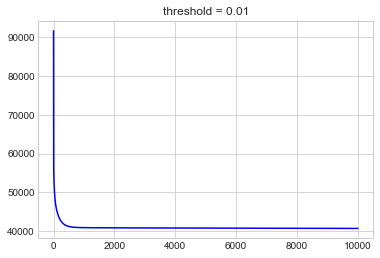

In [155]:
itera_23 = np.arange(iterations_23)
itera.shape
plt.style.use('seaborn-whitegrid')
plt.plot(itera_23, cost_23, color='blue')
plt.title("threshold = 0.01");

In [156]:
## Fit to test data
test_X = test.iloc[:, :14]
test_x = np.full([72480,1],1) # X(0) variables added for beta(0) variables as 1
test_X = np.hstack((test_x,test_X))

Y_test = test["avg_run"]

B_23 = new_B_23

test_Y_pred_23 = np.dot(test_X, B_23)

train_error_23 = cost_function(X, Y, B_23)
test_error_23 = cost_function(test_X, Y_test, B_23)

train_error_23 , test_error_23

(40678.513407279934, 40357.20949343138)

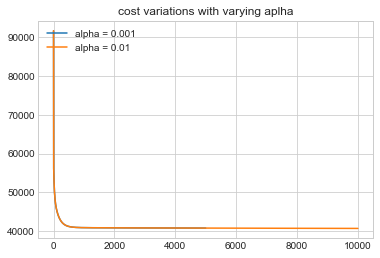

In [165]:
## Graph for experiment 3
#plt.plot(itera_21, cost_21)
plt.plot(itera_22, cost_22)
plt.plot(itera_23, cost_23)
#plt.plot(itera_24, cost_24)

plt.legend(['alpha = 0.001', 'alpha = 0.01'], loc='upper left')
plt.title("cost variations with varying aplha")

plt.show()

### Experiment 3: Pick eight features randomly and retrain your models only on these ten features. Compare train and test error results for the case of using your original set of features (14) and eight random features. Report the ten randomly selected features.

#### To select 8 random columns I have used randint() from numpy that selects random integer value within the specified range, based on those numbers the columns would be selected.

In [166]:
import random
random.seed(123)
random.sample(range(1,14),8)

[1, 5, 2, 7, 12, 11, 10, 13]

#### So now as per the number generated, the columns are
1 = MWG  
5 = NDIMC  
2 = NWG  
7 = NDIMB  
12 = STRN  
11 = STRM  
10 = VWN  
13 = SA  

In [167]:

X_experiment3 = train[["MWG","NDIMC", "NWG", "NDIMB", "STRN", "STRM", "VWN","SA"]]
x = np.full([169120,1],1) # X(0) variables added for beta(0) variables as 1
X_experiment3 = np.hstack((x,X_experiment3)) # full set of X variables

Y = Y = train["avg_run"] # Y avriables

B = np.zeros(X_experiment3.shape[1]) # Initial values of beta variables

X_experiment3.shape, Y.shape#, B.shape #dimensions for the X, Y, beta vectors

((169120, 9), (169120,))

In [171]:
test_X_experiment3 = test[["MWG","NDIMC", "NWG", "NDIMB", "STRN", "STRM", "VWN","SA"]]
x = np.full([72480,1],1) # X(0) variables added for beta(0) variables as 1
test_X_experiment3 = np.hstack((x,test_X_experiment3)) # full set of X variables

test_Y = test["avg_run"] # Y avriables


test_X_experiment3.shape, test_Y.shape#, B.shape #dimensions for the X, Y, beta vectors

((72480, 9), (72480,))

In [169]:
## Retraining the model with optimum alpha, threshold and iterations
def gradient_descent(X_var, Y_actual, B_var, alpha, iterations):
    m = len(Y_actual)
    cost_history = np.zeros(iterations)
    temp_B_var = B_var.copy()
    
    
    for iteration in range(0, iterations):
        Y_pred = np.dot(X_var, B_var)
        cost = cost_function(X_var, Y_actual, B_var)
        cost_history[iteration] = cost

# threshold for the cost reduction
        if abs(cost_history[iteration] - cost_history[iteration - 1]) <= 0.01:
            print(iteration,cost_history[iteration]," ", cost_history[iteration-1])
            break
               
# Because we have added added X0 = 1 for beta(0), we are updating all together
        for j in range (0, 15):
            temp_B_var[j] = B_var[j] - (alpha/m) * sum((Y_pred - Y_actual) * X_var[:,j])
        B_var = temp_B_var.copy()
        
            
    return B_var, cost_history


alpha_3 = 0.0001
iterations_3 = 10000

new_B_3,cost_3 = gradient_descent(X_experiment3, Y, B, alpha_3, iterations_3)

new_B_3, cost_3

(array([ -0.71965404,   3.32577567,   3.05278926,   4.9200373 ,
        -16.81714515, -16.44431361,   0.90349673,   0.92724201,
          3.65341492,  -2.36746923,  -3.27539204,  -2.37310249,
         -0.39050529,   8.38006646,  10.14628958]),
 array([91735.34274862, 70745.75067284, 62239.09063095, ...,
        40678.55535937, 40678.5413746 , 40678.52739057]))

In [170]:
train_error_experiment3 = cost_function(X_experiment3, Y, new_B_3)
test_error_experiment3 = cost_function(test_X_experiment3, test_Y, new_B_3)

train_error = cost_function(X, Y, new_B_23)
test_error = cost_function(test_X, Y_test, new_B_23)
                           
print("train_error_experiment3: ", train_error_experiment3) 
print("test_error_experiment3: ", test_error_experiment3)
print("train_error: ", train_error)
print("test_error: ", test_error)                           

ValueError: shapes (169120,9) and (15,) not aligned: 9 (dim 1) != 15 (dim 0)

### Experiment 4: Now pick eight features that you think are best suited to predict the output, and retrain your models using these ten features. Compare to the case of using your original set of features and to the random features case. Did your choice of features provide better results than picking random features? Why? Did your choice of features provide better results than using all features? Why?

#### I choose my 8 variables from the correlation matrix. Overall the numbers are quite low, but they do have some effect. As per the results the varaibles are
1)	MWG  
2)	NWG  
3)	VWM  
4)	VWN  
5)	MDIMC  
6)	NDIMC  
7)	SA  
8)	SB  

In [ ]:
X_experiment4 = train[["MWG","NDIMC", "NWG", "MDIMC", "SB", "VWM", "VWN","SA"]]
x = np.full([169120,1],1) # X(0) variables added for beta(0) variables as 1
X_experiment4 = np.hstack((x,X_experiment4)) # full set of X variables

Y = Y = train["avg_run"] # Y avriables

B = np.zeros(X_experiment4.shape[1]) # Initial values of beta variables

X_experiment4.shape, Y.shape#, B.shape #dimensions for the X, Y, beta vectors

In [ ]:
test_X_experiment4 = test[["MWG","NDIMC", "NWG", "MDIMC", "SB", "VWM", "VWN","SA"]]
x = np.full([72480,1],1) # X(0) variables added for beta(0) variables as 1
test_X_experiment4 = np.hstack((x,test_X_experiment4)) # full set of X variables

test_Y = test["avg_run"] # Y avriables

test_X_experiment4.shape, test_Y.shape#, B.shape #dimensions for the X, Y, beta vectors

In [ ]:
# Retraining the model with optimum alpha, threshold and iterations
def gradient_descent(X_var, Y_actual, B_var, alpha, iterations):
    m = len(Y_actual)
    cost_history = np.zeros(iterations)
    temp_B_var = B_var.copy()
    
    
    for iteration in range(0, iterations):
        Y_pred = np.dot(X_var, B_var)
        cost = cost_function(X_var, Y_actual, B_var)
        cost_history[iteration] = cost

# threshold for the cost reduction
        if abs(cost_history[iteration] - cost_history[iteration - 1]) <= 0.01:
            print(iteration,cost_history[iteration]," ", cost_history[iteration-1])
            break
               
# Because we have added added X0 = 1 for beta(0), we are updating all together
        for j in range (0, 15):
            temp_B_var[j] = B_var[j] - (alpha/m) * sum((Y_pred - Y_actual) * X_var[:,j])
        B_var = temp_B_var.copy()
        
            
    return B_var, cost_history


alpha_4 = 0.0001
iterations_4 = 10000

new_B_4,cost_4 = gradient_descent(X_experiment4, Y, B, alpha_4, iterations_4)

new_B_4, cost_4

In [ ]:
train_error_experiment4 = cost_function(X_experiment4, Y, new_B_4)
test_error_experiment4 = cost_function(test_X_experiment4, test_Y, new_B_4)

train_error = cost_function(X, Y, new_B_23)
test_error = cost_function(test_X, Y_test, new_B_23)
                           
print("train_error_experiment4: ", train_error_experiment4) 
print("test_error_experiment4: ", test_error_experiment4)
print("train_error: ", train_error)
print("test_error: ", test_error) 